In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import datasets
import glob
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
transcript_tmp = '../../scratch/full_genomes/HIV1_FLT_2016_genome_DNA.part_*.spliced'

transcript_files = sorted(glob.glob(transcript_tmp))

dataset_root = '../../datasets/'
results_root = '../../results/'

In [3]:
info = []

for tfile in transcript_files:

    info.append({})
    with open(tfile) as handle:
        for seqR in SeqIO.parse(handle, 'fasta'):
            info[-1]['id'], region = seqR.id.rsplit('_',1)
            
            if region == 'Gag':
                region = 'GagPol'
            elif region == 'Pol':
                continue
            
            if ('Genome' in region) or ("LTR" in region):
                seq = str(seqR.seq)
            else:
                seq = str(seqR.seq.ungap('-').translate(to_stop=True))

            info[-1][region] = seq
            
info_df = pd.DataFrame(info).fillna('')
info_df.head()

/deepdata/share/conda-envs/envs/ai-tools/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,id,5LTR,GagPol,Vif,Vpr,Tat,Rev,Vpu,Env,Nef,3LTR,Genome
0,B.FR.83.HXB2_LAI_IIIB_BRU.K03455,-TGGAAGGGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATC...,MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,MENRWQVMIVWQVDRMRIRTWKSLVKHHMYVSGKARGWFYRHHYES...,MEQAPEDQGPQREPHNEWTLELLEELKNEAVRHFPRIWLHGLGQHI...,MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,MAGRSGDSDEELIRTVRLIKLLYQSNPPPNPEGTRQARRNRRRRWR...,TQPIPIVAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRL...,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MGGKWSKSSVIGWPTVRERMRRAEPAADRVGAASRDLEKHGAITSS...,-TGGAAGGGCTAATTCACTCCCAAAGAAGACAAGATATCCTTGATC...,TGGAAGGGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCT...
1,A1.AU.03.PS1044_Day0.DQ676872,,MGARASILSGGRLDAWEKIRLRPGGKKKYRLKHLVWASRELERFAL...,MENRWQVMIVWQVDRMRIRTWNSLVKHHMHISKKTKKWSYRHHFES...,MEQAPEDQGPQREPYNEWTLELLEELKQEAVRHFPRPWLHGLGQYI...,MDPVDPNLEPWNHPGSQPTTACNKCYCKKCCYHCPSCFLNKGLGIS...,MAGRSGDSDEDLLKAIRIIKJLYQSNPYPKPRGTRQARKNRRRRWR...,MTPLEIWSIVGLVVALIIAIVVWTIVGIEYKKLLKQRKIDRLIERI...,MRAKGIQMNLHCLLKWGTMILGMILICSAAEQRWVTVYYGVPVWKD...,MGGKWSKRSSKGWSEIREKIRQTPTAAEGVGAVSKDLDKHGAVTSS...,-TGGATGGGTTAATTTACTCCARGAAGAGACAAGAAATCCTTGATC...,ATGGGTGCGAGAGCGTCAATATTAAGCGGGGGAAGATTAGATGCAT...
2,A1.CD.02.LA01AlPr.KU168256,-TGGATGGGTTAATTCACTCCAAGAAAAGACAACAGATTCTTGATC...,MGARASVLSGGKLDAWEKIRLRPGGKKKYRMKHLVWASRELERFAL...,MENRWQVMIVWQVDRMRIRIWHSLVKHHMYISKKAKDWFYRHHYES...,MEQAPEDQGPPREPYQEWMLELLEELKHEAVRHFPRPWLHGLGQHI...,MELVDPNLDPWNHPGSQPTTACNSCYCKKCCWHCQLCFLRKGLGIF...,MAGRSGDADAELLTAVRIIKILYQSNPYPKPRGTRQAQRNRRRRWR...,MTPLEIGAIAGLIVALILAIIVWTIVGIEYRKLLKQRRIDRLLEKI...,MRVMGTQKSYQNLWRWGIVIFGLVIICNAGQLWVTVYYGVPAWKDA...,MGGKWSKRSMPGWPEIRERMRRTQTPPAAQTPPAAVGVGPVSQDLD...,-TGGATGGGTTAATTCACTCCAAGAAAAGACAACAGATTCTTGATC...,TGGATGGGTTAATTCACTCCAAGAAAAGACAACAGATTCTTGATCT...
3,A1.CH.03.HIV_CH_BID_V3538_2003.JQ403028,,MGARASILSGGKLDAWEKIRLRPGGKKAYKLKHLVWASRELERFAI...,MENRWQVMIVWQVDRMKIRTWHSLVKHHMYISKKAKEWCYRHHYES...,MEQAPEDQGPQREPYNEWMLELLEELKHEAVRHFPRQWLQGLGQHI...,MEPVDPNLEPWKHPGSQPTTPCSNCYCKKCCWHCQVCFLKKGLGIS...,MAGRSGSTDEELIQAVRIIKILYQSNPYPKPRGTRQARKNRRRRWR...,MSPLEIYAIAGLIVALIIAIVVWTIVGIEYKRLLKQRRIDRLIERI...,MRVMGMQRNYPHWWKWGIVLFWLLIICNATEKLWVTVYYGVPVWKD...,MGGKWSKSSIVGWPEIRERMRRTPAAAEGVGAVSRDLERHGAITSS...,-TGGATGGGTTAATTTACTCCAGGAAAAGACAAGAAATCCTTGATC...,ATGGGTGCGAGAGCGTCAATATTAAGCGGGGGAAAATTAGATGCAT...
4,A1.CM.03.CM54_7.KU168305,-TGGAAGGGTTAATCTACTCAAAGAAAAGACAAGACATCCTTGATA...,MGARASVLSGGKLDAWEKIRLRPGGKKKYKLKHLVWASRELDRFAL...,MENRWQGMIVWQVDRMRIRTWNSLVKHHMYVSKKAKGWFYRHHFES...,MEQAPEDQGPQREPYNEWMLELLEDLKHEAVRHFPRPWLHGLGQHI...,MDPVDPNLEPWNHPGSQPTTACSTCFCKKCCYHCPVCFLRKGLGIS...,MAGRSGNSDEALLTAIKIIKILYQSNPYPKPKGTRQARKNRRRRWR...,MQALEICAIVGLIVALILAIVVWSIVGIEYKRLLKQRKIDRLINRI...,MRVMGTQTSYQNLWRWGTIILGMIIICSVAEERWVTVYYGVPVWRD...,MGGKWSKSSIVGWPNIRERMRQTPPAATGVGEVSQDLDKHGAITSS...,-TGGAAGGGTTAATCTACTCAAAGAAAAGACAAGACATCCTTGATA...,--TGGAAGGGTTAATCTACTCAAAGAAAAGACAAGACATCCTTGAT...


In [4]:
cols = ['GagPol', 'Vif', 'Vpr', 'Tat', 'Rev', 'Vpu', 'Env', 'Nef']

lns = {}
for c in cols:
    lns[c] = info_df[c].str.len()
    
ln_df = pd.DataFrame(lns)
ln_df.head()

,GagPol,Vif,Vpr,Tat,Rev,Vpu,Env,Nef
0,500,192,78,86,116,82,856,123
1,499,192,96,101,123,81,870,204
2,501,192,96,101,123,81,866,210
3,498,192,97,101,123,81,854,207
4,498,192,96,102,123,81,852,205


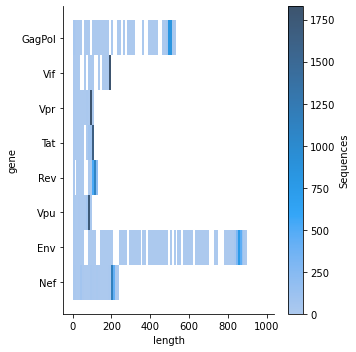

In [6]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))

mdf = pd.melt(ln_df, 
        value_vars = cols,
             value_name = 'length',
             var_name = 'gene')

sns.histplot(data = mdf,
             x = 'length',
             y = 'gene',
             bins = (np.arange(0, 1000, 10), cols),
             cbar = True, cbar_kws={'label': 'Sequences'})

sns.despine(ax=ax)
fig.tight_layout()
fig.savefig(results_root + 'Fig2_LANL.png')

## Dataset Statistics

## Dataset Creation

In [29]:
# TODO: Add BibTeX citation
# Find for instance the citation on arxiv or on the dataset repo/website
_CITATION = """\
@InProceedings{huggingface:dataset,
title = {HIV Full Geneome Dataset},
author={Will Dampier
},
year={2021}
}
"""

# TODO: Add a link to an official homepage for the dataset here
_HOMEPAGE = ""

# TODO: Add the licence for the dataset here if you can find it
_LICENSE = ""

# TODO: Add description of the dataset here
# You can copy an official description
_DESCRIPTION = """\
This dataset was constructured from the LANL Full Genome Database v2016.
Genes were extracted from the genome using the GeneCutter webtool provided by the database.
"""


In [30]:
genome_info = datasets.DatasetInfo(description = _DESCRIPTION,
                                  homepage=_HOMEPAGE, license = _LICENSE, citation=_CITATION)
genome_dset = datasets.Dataset.from_pandas(info_df,
                                          info = genome_info)
genome_dset
genome_dset.save_to_disk(dataset_root + 'FLT_genome')